# ASSIGNMENT ON CLASSIFICATION

In [1]:
#import required libraries


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. Read the dataset to python environment

In [2]:
#read the dataset and display

data = pd.read_excel(r'C:\Users\HP\Desktop\Python DSA\assignments\iris (1).xls')
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


# Basic details of the dataset

In [3]:
#shape of the data

data.shape

(150, 5)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [5]:
data.dtypes

SL                float64
SW                float64
PL                float64
PW                float64
Classification     object
dtype: object

In [6]:
# some basic statistical analysis about the data

data.describe()

,SL,SW,PL,PW
count,143.000000,144.000000,144.000000,150.000000
mean,5.855944,3.049306,3.756250,1.198667
std,0.828168,0.430644,1.761306,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


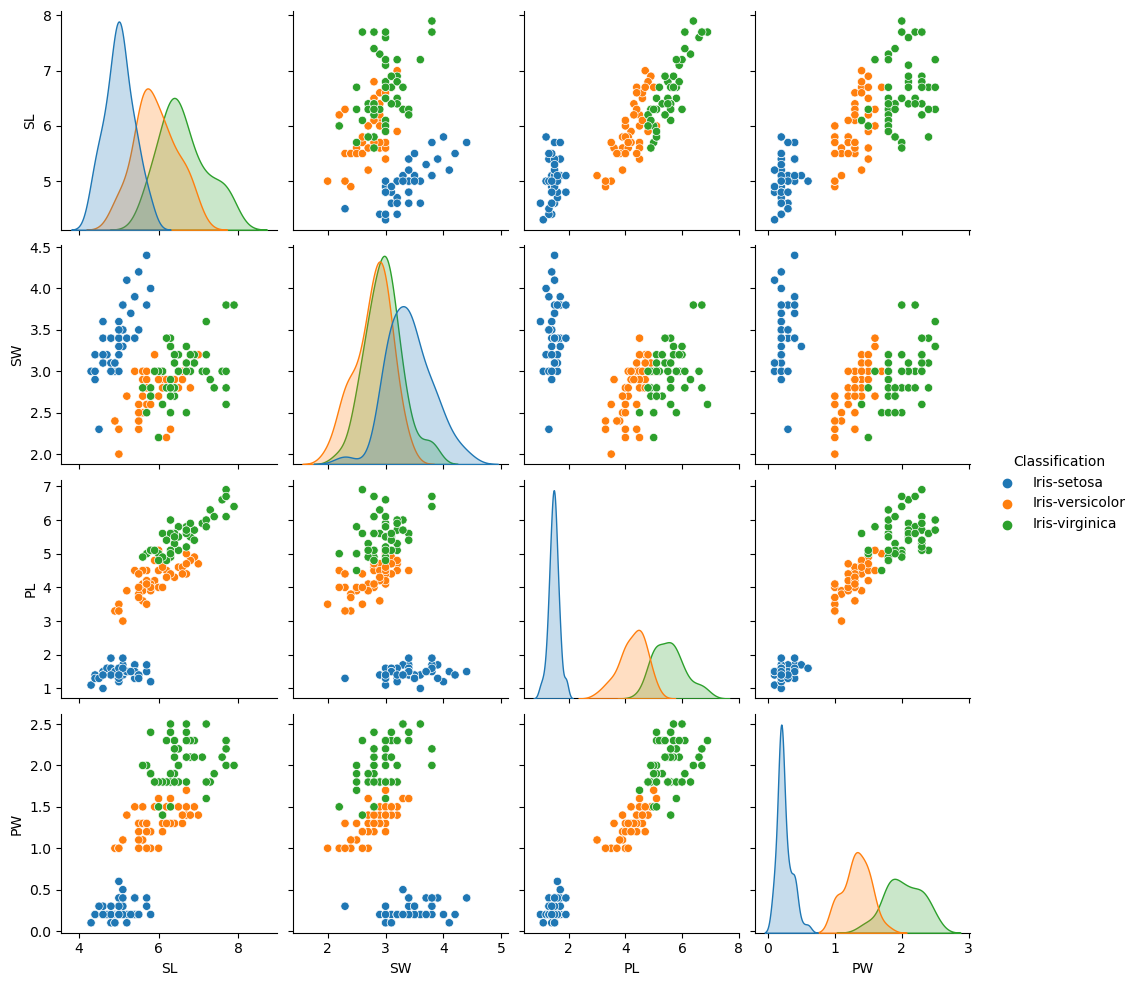

In [7]:
#visualization of the data

sns.pairplot(data,hue='Classification')

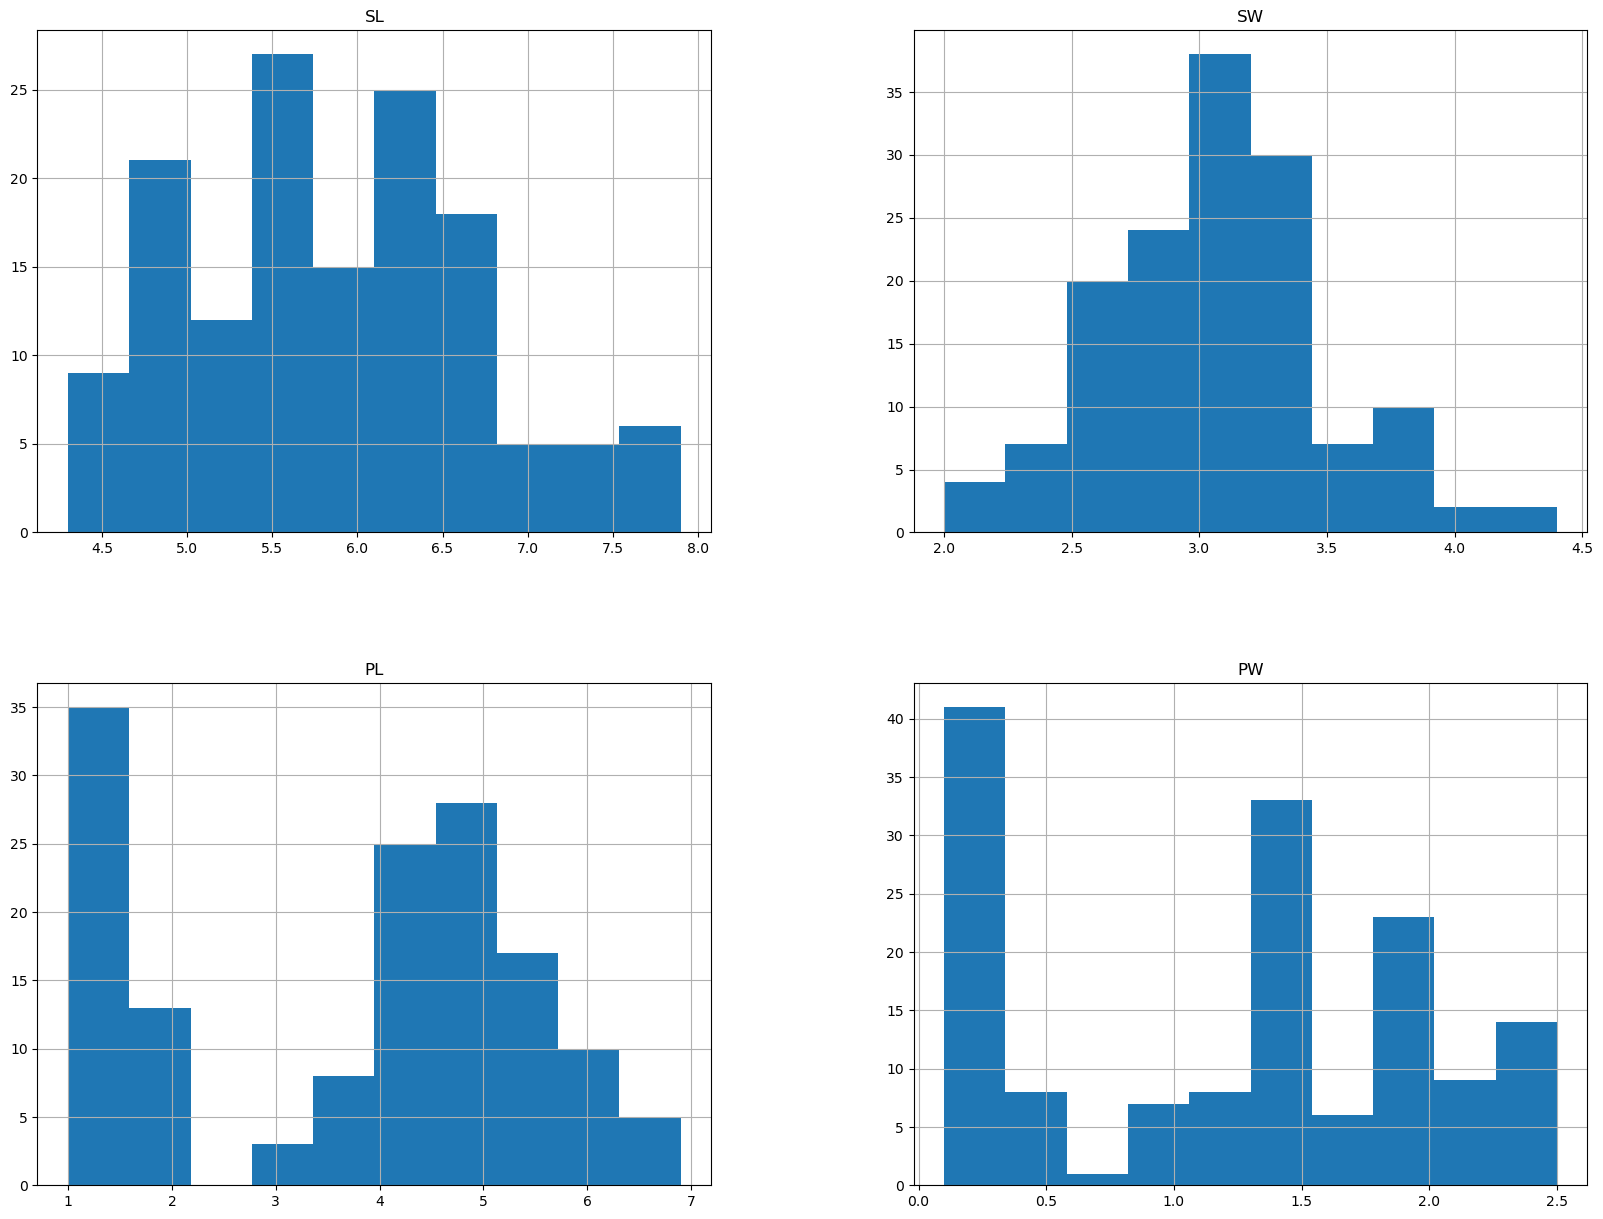

In [8]:
#plot graphs for float data types

fregraph = data.select_dtypes(include=['float'])
fregraph.hist(figsize=(20,15))
plt.show()

# 2. Do the necessary pre-processing steps

# Missing value handling

In [9]:
#check for missing values

data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [10]:
#handling the missing value with median

for i in ['SL','SW','PL']:
    data[i] = data[i].fillna(data[i].median())

In [11]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

# Outlier detection

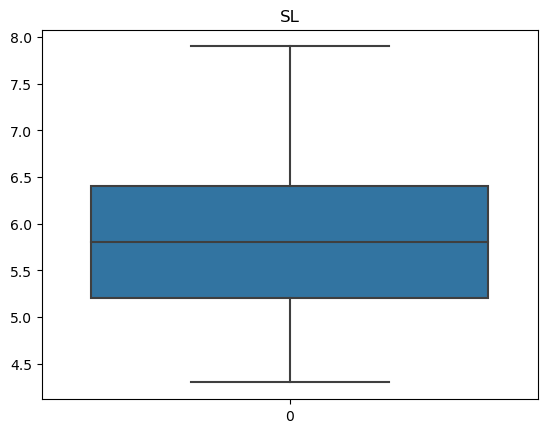

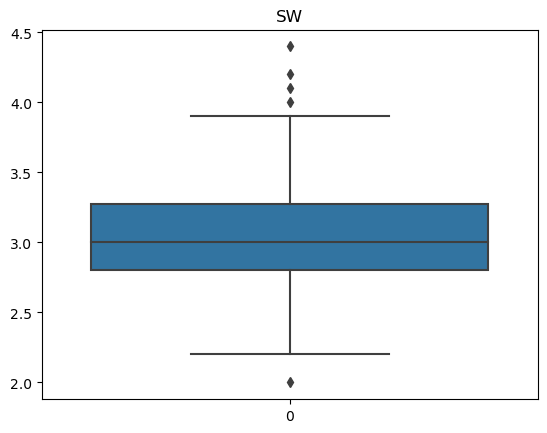

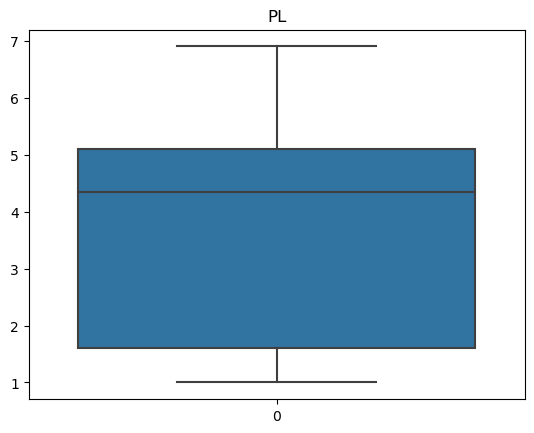

In [12]:
#create a boxplot to display outlier


num_cols = ['SL','SW','PL']
for i in num_cols:
    plt.figure()
    sns.boxplot(data[i])
    plt.title(i)

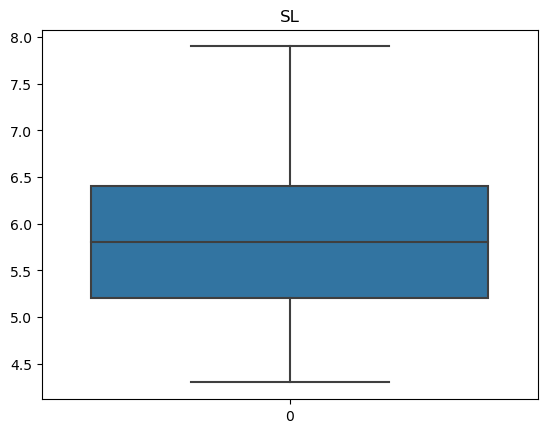

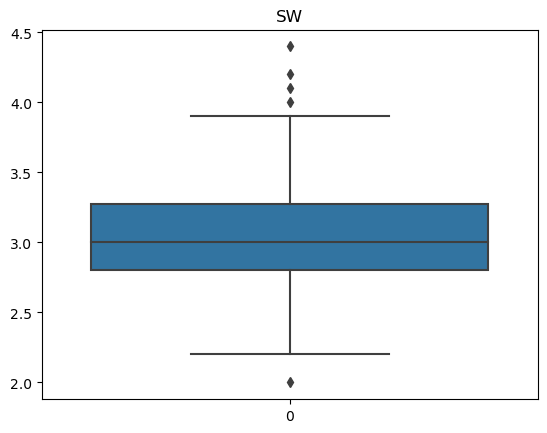

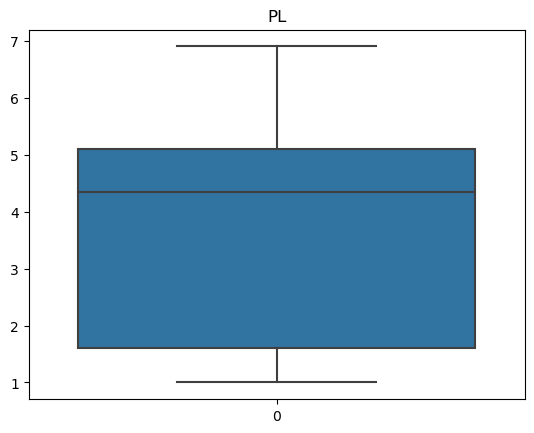

In [13]:
#create a boxplot to display outlier


num_cols = ['SL','SW','PL']
for i in num_cols:
    plt.figure()
    sns.boxplot(data[i])
    plt.title(i)

SW has outliers.

In [14]:
import warnings 
warnings.filterwarnings('ignore', category=UserWarning)

In [15]:
#finding the quartiles

Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
Q3 = np.percentile(data['SW'],75,interpolation='midpoint')

C:\Users\HP\AppData\Local\Temp\ipykernel_16932\1751410385.py:3: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q1 = np.percentile(data['SW'],25,interpolation='midpoint')
C:\Users\HP\AppData\Local\Temp\ipykernel_16932\1751410385.py:4: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpoint' are encouraged to review the method they used. (Deprecated NumPy 1.22)
  Q2 = np.percentile(data['SW'],50,interpolation='midpoint')
C:\Users\HP\AppData\Local\Temp\ipykernel_16932\1751410385.py:5: DeprecationWarning: the `interpolation=` argument to percentile was renamed to `method=`, which has additional options.
Users of the modes 'nearest', 'lower', 'higher', or 'midpo

In [16]:
#print the quartiles

print(Q1)
print(Q2)
print(Q3)

2.8
3.0
3.25


In [17]:
#Calculating interquartile range

IQR = Q3-Q1

#print iqr

print(IQR)

0.4500000000000002


In [18]:
#setting upper limit & lower limit and print values

up_lim = Q3+1.5*IQR
low_lim = Q1-1.5*IQR

print(up_lim)
print(low_lim)

3.9250000000000003
2.1249999999999996


In [19]:
#by using flooring and capping handle the outliers

data['SW'] = np.where(data['SW']>up_lim,up_lim,np.where(data['SW']<low_lim,low_lim,data['SW']))

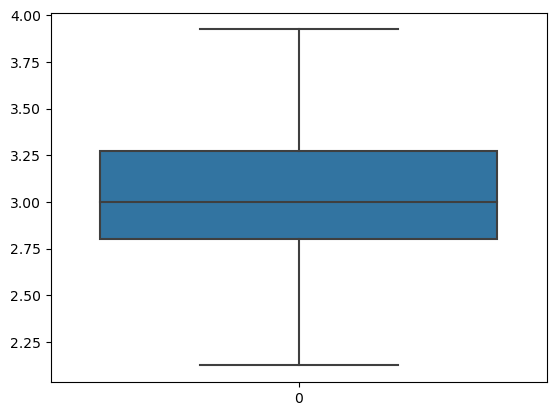

In [20]:
#boxplot with handled outliers

sns.boxplot(data['SW'])
plt.show()

# Correlation Heatmap

C:\Users\HP\AppData\Local\Temp\ipykernel_16932\1207977837.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corrmatrix = data.corr()


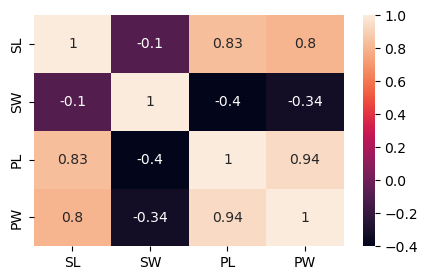

In [21]:
corrmatrix = data.corr()
plt.figure(figsize=(5,3))
sns.heatmap(corrmatrix,annot=True)
plt.show()

# Encoding the data set

In [22]:
from sklearn.preprocessing import LabelEncoder

In [23]:
le = LabelEncoder()

In [24]:
data['Classification'] = le.fit_transform(data['Classification'])

In [25]:
data['Classification'].unique()

array([0, 1, 2])

In [26]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [27]:
data.shape

(150, 5)

In [28]:
#splitting data to feature and target

x = data.drop(['Classification'],axis=1)
y = data['Classification']

In [29]:
#Split the data into training and testing sets

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

# 3. Find out which classification model gives the best result (try all the classification algorithms discussed in the session)¶

# 1.logistic regression

In [30]:
#logistic regression

from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr = logit_model.predict(x_test)


Evaluate the performance

In [31]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
Accuracy_L= accuracy_score(y_test,y_pred_lr)
precision = precision_score(y_test,y_pred_lr,average='macro')
Recall = recall_score(y_test,y_pred_lr,average='macro')
f1_score =f1_score(y_test,y_pred_lr,average='macro')

print('Logistic accuracy=',Accuracy_L)
print('Precision=',precision)
print('Recall=',Recall)
print('f1 score=',f1_score)


Logistic accuracy= 1.0
Precision= 1.0
Recall= 1.0
f1 score= 1.0


Confusion matrix

In [32]:
confusion_matrix(y_test,y_pred_lr)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [33]:
y_pred_lr,y_test

(array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
        0, 2, 2, 2, 2, 2, 0, 0]),
 73     1
 18     0
 118    2
 78     1
 76     1
 31     0
 64     1
 141    2
 68     1
 82     1
 110    2
 12     0
 36     0
 9      0
 19     0
 56     1
 104    2
 69     1
 55     1
 132    2
 29     0
 127    2
 26     0
 128    2
 131    2
 145    2
 108    2
 143    2
 45     0
 30     0
 Name: Classification, dtype: int32)

# 2.kNN

In [34]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2) 
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

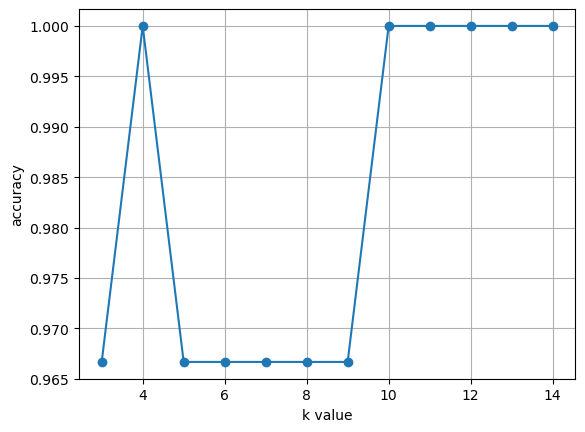

In [35]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

Make predictions and evaluate the performance:

In [36]:
classifier = KNeighborsClassifier(n_neighbors =4, metric = 'minkowski',p=2) 
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [37]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
print('Accuracy kNN= ',accuracy_score(y_test,y_pred_knn))
print('precision = ',precision_score(y_test,y_pred_knn,average='macro'))
print('Recall = ',recall_score(y_test,y_pred_knn,average='macro'))
print('f1 score =',f1_score(y_test,y_pred_knn,average='macro'))

Accuracy kNN=  1.0
precision =  1.0
Recall =  1.0
f1 score = 1.0


Confusion matrix

In [38]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# 3.SVM

In [39]:
# svm

from sklearn.svm import SVC
svmclf = SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [40]:
y_pred = svmclf.predict(x_test)

In [41]:
from sklearn.metrics import accuracy_score,confusion_matrix
Accuracy_SVC = accuracy_score(y_test,y_pred)

print('Accuracy SVC= ',Accuracy_SVC)

Accuracy SVC=  1.0


In [42]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Decision tree

In [43]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)

In [44]:
Accuracy_Decision_tree = accuracy_score(y_test,y_pred)

print('Accuracy Decision tree= ',Accuracy_Decision_tree)


Accuracy Decision tree=  1.0


In [45]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Random Forest

In [46]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [47]:
y_pred=rf_clf.predict(x_test)

In [48]:
Accuracy_random_forest =accuracy_score(y_test,y_pred)

print('Accuracy Random Forest= ',Accuracy_random_forest)

Accuracy Random Forest=  1.0


In [49]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Standard scaling

In [50]:
x.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.853333,3.041500,3.780000,1.198667
std,0.808567,0.402924,1.729424,0.763161
min,4.300000,2.125000,1.000000,0.100000
25%,5.200000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.275000,5.100000,1.800000
max,7.900000,3.925000,6.900000,2.500000


In [51]:
from sklearn.preprocessing import StandardScaler
std_scl = StandardScaler()
x = std_scl.fit_transform(x)

In [52]:
type(x)

numpy.ndarray

In [53]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [54]:
x = pd.DataFrame(x,columns=['SL', 'SW', 'PL', 'PW'])

In [55]:
x.describe()

,SL,SW,PL,PW
count,1.500000e+02,1.500000e+02,150.000000,1.500000e+02
mean,-1.894781e-16,-2.605323e-16,0.000000,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350,1.003350e+00
min,-1.927530e+00,-2.282244e+00,-1.612857,-1.444450e+00
25%,-8.107207e-01,-6.013769e-01,-1.264758,-1.181504e+00
50%,-6.618128e-02,-1.033422e-01,0.330694,1.332259e-01
75%,6.783581e-01,5.814555e-01,0.765817,7.905908e-01
max,2.539707e+00,2.200068e+00,1.810113,1.710902e+00


logistic regression

In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr = logit_model.predict(x_test)

In [57]:
Accuracy_logistic_standard_scaling = accuracy_score(y_test,y_pred_lr)
precision = precision_score(y_test,y_pred_lr,average='macro')
Recall = recall_score(y_test,y_pred_lr,average='macro')
f1_score =f1_score(y_test,y_pred_lr,average='macro')


print('Accuracy Logistic SS=',Accuracy_logistic_standard_scaling)
print('Precision=',precision)
print('Recall=',Recall)
print('f1 score=',f1_score)

Accuracy Logistic SS= 0.9666666666666667
Precision= 0.9722222222222222
Recall= 0.9629629629629629
f1 score= 0.9658994032395567


In [58]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

kNN

In [59]:
# knn

from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2) 
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

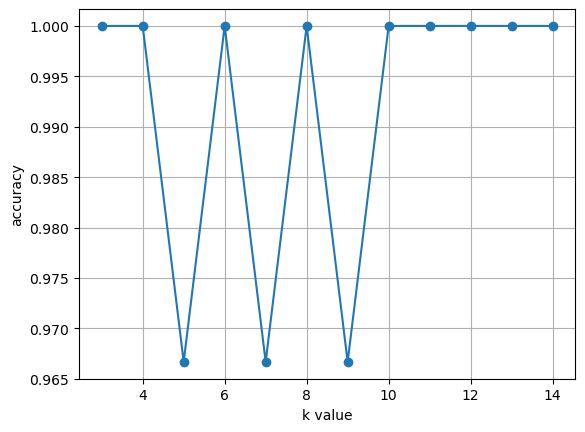

In [60]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [61]:
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski',p=2) 
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [62]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
Accuracy_Knn = accuracy_score(y_test,y_pred_knn)
precision = precision_score(y_test,y_pred_knn,average='macro')
Recall = recall_score(y_test,y_pred_knn,average='macro')
f1_score =f1_score(y_test,y_pred_knn,average='macro')

print('Accuracy (Logistic ss)=',Accuracy_Knn)
print('Precision=',precision)
print('Recall=',Recall)
print('f1 score=',f1_score)

Accuracy (Logistic ss)= 1.0
Precision= 1.0
Recall= 1.0
f1 score= 1.0


In [63]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

SVM

In [64]:
#svm

from sklearn.svm import SVC
svmclf = SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [65]:
y_pred = svmclf.predict(x_test)

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix
Accuracy_SVC = accuracy_score(y_test,y_pred)

print('Accuracy SVC ss= ',Accuracy_SVC)

Accuracy SVC ss=  0.9666666666666667


In [68]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  8  1]
 [ 0  0 11]]


Decision tree

In [69]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)

In [70]:
Accuracy_Decision_tree = accuracy_score(y_test,y_pred)

print('Accuracy Decision tree ss= ',Accuracy_Decision_tree)

Accuracy Decision tree ss=  1.0


In [71]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Random Forest

In [72]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [73]:
y_pred=rf_clf.predict(x_test)

In [74]:
Accuracy_random_forest =accuracy_score(y_test,y_pred)

print('Accuracy Random Forest ss= ',Accuracy_random_forest)

Accuracy Random Forest ss=  1.0


In [75]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


# Minmax scaling

In [76]:
x.describe()

,SL,SW,PL,PW
count,1.500000e+02,1.500000e+02,150.000000,1.500000e+02
mean,-1.894781e-16,-2.605323e-16,0.000000,-2.842171e-16
std,1.003350e+00,1.003350e+00,1.003350,1.003350e+00
min,-1.927530e+00,-2.282244e+00,-1.612857,-1.444450e+00
25%,-8.107207e-01,-6.013769e-01,-1.264758,-1.181504e+00
50%,-6.618128e-02,-1.033422e-01,0.330694,1.332259e-01
75%,6.783581e-01,5.814555e-01,0.765817,7.905908e-01
max,2.539707e+00,2.200068e+00,1.810113,1.710902e+00


In [77]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
x = min_max.fit_transform(x)

In [78]:
type(x)

numpy.ndarray

In [79]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [80]:
x = pd.DataFrame(x,columns=['SL', 'SW', 'PL', 'PW'])

In [81]:
x.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,0.431481,0.509167,0.471186,0.457778
std,0.224602,0.223847,0.293123,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.375000,0.101695,0.083333
50%,0.416667,0.486111,0.567797,0.500000
75%,0.583333,0.638889,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [82]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.2,random_state=42)

logistic regression

In [83]:
logit_model = LogisticRegression()
logit_model.fit(x_train,y_train)
y_pred_lr = logit_model.predict(x_test)


In [84]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
Accuracy_L= accuracy_score(y_test,y_pred_lr)
precision = precision_score(y_test,y_pred_lr,average='macro')
Recall = recall_score(y_test,y_pred_lr,average='macro')
f1_score =f1_score(y_test,y_pred_lr,average='macro')

print('Accuracy (Logistic mm)=',Accuracy_L)
print('Precision=',precision)
print('Recall=',Recall)
print('f1 score=',f1_score)

Accuracy (Logistic mm)= 0.9666666666666667
Precision= 0.9722222222222222
Recall= 0.9629629629629629
f1 score= 0.9658994032395567


In [85]:
confusion_matrix(y_test,y_pred_lr)

array([[10,  0,  0],
       [ 0,  8,  1],
       [ 0,  0, 11]], dtype=int64)

kNN

In [86]:
#knn

from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2) 
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

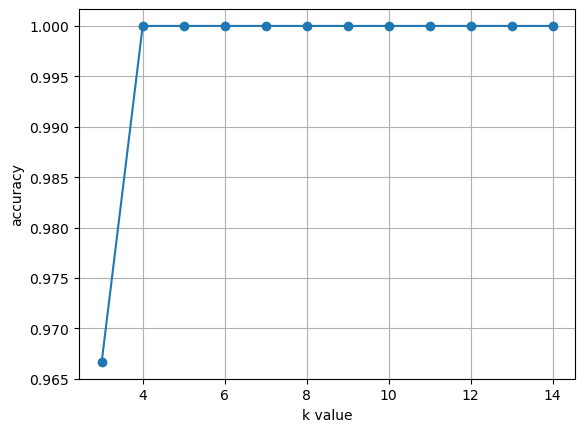

In [87]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [88]:
classifier = KNeighborsClassifier(n_neighbors = 4, metric = 'minkowski',p=2) 
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [89]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
Accuracy_Knn = accuracy_score(y_test,y_pred_knn)
precision = precision_score(y_test,y_pred_knn,average='macro')
Recall = recall_score(y_test,y_pred_knn,average='macro')
f1_score =f1_score(y_test,y_pred_knn,average='macro')

print('Accuracy (knn mm)=',Accuracy_Knn)
print('Precision=',precision)
print('Recall=',Recall)
print('f1 score=',f1_score)

Accuracy (knn mm)= 1.0
Precision= 1.0
Recall= 1.0
f1 score= 1.0


In [90]:
confusion_matrix(y_test,y_pred_knn)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

SVM

In [91]:
#svm

from sklearn.svm import SVC
svmclf = SVC(kernel='linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [92]:
y_pred = svmclf.predict(x_test)

In [93]:
from sklearn.metrics import accuracy_score,confusion_matrix
Accuracy_SVC = accuracy_score(y_test,y_pred)

print('Accuracy SVC mm= ',Accuracy_SVC)

Accuracy SVC mm=  1.0


In [94]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Decision tree

In [96]:
#Decision tree

from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)

In [97]:
Accuracy_Decision_tree = accuracy_score(y_test,y_pred)

print('Accuracy Decision tree mm= ',Accuracy_Decision_tree)

Accuracy Decision tree mm=  1.0


In [98]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


Random Forest

In [99]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [100]:
y_pred=rf_clf.predict(x_test)

In [101]:
Accuracy_random_forest =accuracy_score(y_test,y_pred)

print('Accuracy Random Forest mm= ',Accuracy_random_forest)

Accuracy Random Forest mm=  1.0


In [102]:
print(confusion_matrix(y_test,y_pred))

[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


<font color='red'>Before scaling:</font>

Logistic accuracy= 1.0

Accuracy kNN=  1.0

Accuracy SVM=  1.0

Accuracy Decision tree=  1.0

Accuracy Random Forest=  1.0






<font color='red'>After Standard scaling:</font>

Logistic accuracy= 0.9666666666666667

Accuracy kNN= 1.0

Accuracy SVM=  0.9666666666666667

Accuracy Decision tree =  1.0

Accuracy Random Forest =  1.0






<font color='red'>After Minmax scaling:</font>

Logistic accuracy= 0.9666666666666667

Accuracy kNN= 1.0

Accuracy SVM=  1.0

Accuracy Decision tree =  1.0

Accuracy Random Forest =  1.0



<font color='green'>According to this result we get best models without scaling.Logistic regression, k-Nearest Neighbors(k-NN),Support Vector Machines(SVM),Decision trees,Random Forest all these models gives the best result.Because these models have accuracy 1.After scaling logistic regression and SVM have accuracy slightly lessthan 1.
</font>